# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [2]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`.

In [3]:
temp

City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000

#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [4]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In [5]:
"""
We have two columns of categorical datas (City name and state) and one with numeric data corresponding 
to the temperature in those places.
"""

'\nWe have two columns of categorical datas (City name and state) and one with numeric data corresponding \nto the temperature in those places.\n'

#### Select the rows where state is New York.

In [6]:
nys = temp.loc[(temp['State'] == 'New York')]
nys

City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333

#### What is the average temperature of cities in New York?

In [7]:
nys['Temperature'].mean()

10.74074074074074

#### Which states and cities have a temperature above 15 degrees Celsius?

In [8]:
temp.loc[(temp['Temperature'] > 15)]

City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222
5    Treton   New Jersey    22.222222
6    Newark   New Jersey    20.000000

#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [9]:
temp.loc[(temp['Temperature'] > 15)]['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [10]:
temp.loc[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]['City']

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and standard deviation of the temperature of each state.

In [137]:
mean_temp = temp.groupby('State', as_index = False)['Temperature'].agg(['mean', 'std'])
mean_temp

mean       std
State                           
Connecticut  15.833333  1.964186
New Jersey   21.111111  1.571348
New York     10.740741  8.133404

# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [138]:
employees = pd.read_csv('Employee.csv')
employees

Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
6  Carlos         IT    Master      M         VP      8      70
7   Pedro         IT       Phd      M  associate      7      60
8     Ana         HR    Master      F         VP      8      70

#### Explore the data types of the `employees` dataframe. Comment your results.

In [139]:
employees.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [15]:
"""
The dataframe contains 5 columns of categorical datas and 2 of numeric data
"""

'\nThe dataframe contains 5 columns of categorical datas and 2 of numeric data\n'

#### What's the average salary in this company?

In [16]:
employees['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [17]:
employees['Salary'].max()

70

#### What's the lowest salary?

In [18]:
employees['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [19]:
employees.loc[(employees['Salary'] == employees['Salary'].min())]['Name']

1    Maria
2    David
Name: Name, dtype: object

#### Find all the information about an employee called David.

In [20]:
employees.loc[(employees['Name'] == 'David')]

Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30

#### Could you return only David's salary?

In [21]:
employees.loc[(employees['Name'] == 'David')]['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate.

In [22]:
employees.loc[(employees['Title'] == 'associate')]

Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60

#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [23]:
# Method 1
employees[:3]

Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30

In [24]:
# Method 2
employees.iloc[:3]

Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30

#### Find the employees whose title is associate and whose salary is above 55.

In [25]:
employees.loc[(employees['Title'] == 'associate') & (employees['Salary'] > 55)]['Name']

7    Pedro
Name: Name, dtype: object

#### Group the employees by number of years of employment. What are the average salaries in each group?

In [26]:
employees.groupby('Years', as_index = False).agg({'Salary':'mean'}).rename(columns = {'Salary':'Average Salary'})

Years  Average Salary
0      1       35.000000
1      2       38.333333
2      3       55.000000
3      4       35.000000
4      7       60.000000
5      8       70.000000

####  What is the average salary per title?

In [27]:
employees.groupby('Title', as_index = False).agg({'Salary':'mean'}).rename(columns = {'Salary':'Average Salary'})

Title  Average Salary
0         VP       70.000000
1    analyst       32.500000
2  associate       56.666667

####  Find the salary quartiles.


In [28]:
employees['Salary'].describe()[['25%', '50%', '75%']]

25%    35.0
50%    55.0
75%    60.0
Name: Salary, dtype: float64

#### Is the mean salary different per gender?

In [29]:
employees.groupby('Gender', as_index = False).agg({'Salary':'mean'}).rename(columns = {'Salary':'Average Salary'})

Gender  Average Salary
0      F            47.5
1      M            50.0

#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [140]:
department_stats = employees.groupby(['Department']).agg(['min', 'mean', 'max'])
department_stats

Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [67]:
orders = pd.read_csv('Orders.zip')
orders

Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
0                0     536365    85123A  2010     12    3     8   
1                1     536365     71053  2010     12    3     8   
2                2     536365    84406B  2010     12    3     8   
3                3     536365    84029G  2010     12    3     8   
4                4     536365    84029E  2010     12    3     8   
...            ...        ...       ...   ...    ...  ...   ...   
397919      541904     581587     22613  2011     12    5    12   
397920      541905     581587     22899  2011     12    5    12   
397921      541906     581587     23254  2011     12    5    12   
397922      541907     581587     23255  2011     12    5    12   
397923      541908     581587     22138  2011     12    5    12   

                                Description  Quantity          InvoiceDate  \
0        white hanging heart t-light holder         6  2010-12-01 08:26:00   
1                       white metal lantern         6  2010-12-01 08:26:00   
2            cream cupid hearts coat hanger         8  2010-12-01 08:26:00   
3       knitted union flag hot water bottle         6  2010-12-01 08:26:00   
4            red woolly hottie white heart.         6  2010-12-01 08:26:00   
...                                     ...       ...                  ...   
397919          pack of 20 spaceboy napkins        12  2011-12-09 12:50:00   
397920         children's apron dolly girl          6  2011-12-09 12:50:00   
397921        childrens cutlery dolly girl          4  2011-12-09 12:50:00   
397922      childrens cutlery circus parade         4  2011-12-09 12:50:00   
397923        baking set 9 piece retrospot          3  2011-12-09 12:50:00   

        UnitPrice  CustomerID         Country  amount_spent  
0            2.55       17850  United Kingdom         15.30  
1            3.39       17850  United Kingdom         20.34  
2            2.75       17850  United Kingdom         22.00  
3            3.39       17850  United Kingdom         20.34  
4            3.39       17850  United Kingdom         20.34  
...           ...         ...             ...           ...  
397919       0.85       12680          France         10.20  
397920       2.10       12680          France         12.60  
397921       4.15       12680          France         16.60  
397922       4.15       12680          France         16.60  
397923       4.95       12680          France         14.85  

[397924 rows x 14 columns]

#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [35]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [36]:
orders.describe()

Unnamed: 0      InvoiceNo           year          month  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean   278465.221859  560617.126645    2010.934259       7.612537   
std    152771.368303   13106.167695       0.247829       3.416527   
min         0.000000  536365.000000    2010.000000       1.000000   
25%    148333.750000  549234.000000    2011.000000       5.000000   
50%    284907.500000  561893.000000    2011.000000       8.000000   
75%    410079.250000  572090.000000    2011.000000      11.000000   
max    541908.000000  581587.000000    2011.000000      12.000000   

                 day           hour       Quantity      UnitPrice  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean        3.614555      12.728247      13.021823       3.116174   
std         1.928274       2.273535     180.420210      22.096788   
min         1.000000       6.000000       1.000000       0.000000   
25%         2.000000      11.000000       2.000000       1.250000   
50%         3.000000      13.000000       6.000000       1.950000   
75%         5.000000      14.000000      12.000000       3.750000   
max         7.000000      20.000000   80995.000000    8142.750000   

          CustomerID   amount_spent  
count  397924.000000  397924.000000  
mean    15294.315171      22.394749  
std      1713.169877     309.055588  
min     12346.000000       0.000000  
25%     13969.000000       4.680000  
50%     15159.000000      11.800000  
75%     16795.000000      19.800000  
max     18287.000000  168469.600000

In [37]:
"""
your comments here
"""

'\nyour comments here\n'

####  What is the average purchase price?

In [38]:
orders['amount_spent'].mean()

22.39474850474768

#### What are the highest and lowest purchase prices? 

In [39]:
orders['amount_spent'].max()

168469.6

In [40]:
orders['amount_spent'].loc[(orders['amount_spent'] > 0.0)].min()

0.001

#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [121]:
spain_cust = orders.loc[(orders['amount_spent'] > 0.0) & (orders['Country'] == 'Spain')].drop_duplicates()
spain_cust

Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250          6421     536944     22383  2010     12    5    12   
4251          6422     536944     22384  2010     12    5    12   
4252          6423     536944     20727  2010     12    5    12   
4253          6424     536944     20725  2010     12    5    12   
4254          6425     536944     20728  2010     12    5    12   
...            ...        ...       ...   ...    ...  ...   ...   
394733      535271     581193     23291  2011     12    3    17   
394734      535272     581193    85232D  2011     12    3    17   
394735      535273     581193     22721  2011     12    3    17   
394736      535274     581193     23241  2011     12    3    17   
394737      535275     581193     23247  2011     12    3    17   

                          Description  Quantity          InvoiceDate  \
4250          lunch bag suki  design         70  2010-12-03 12:20:00   
4251          lunch bag pink polkadot       100  2010-12-03 12:20:00   
4252          lunch bag  black skull.        60  2010-12-03 12:20:00   
4253          lunch bag red retrospot        70  2010-12-03 12:20:00   
4254              lunch bag cars blue       100  2010-12-03 12:20:00   
...                               ...       ...                  ...   
394733       dolly girl childrens cup         2  2011-12-07 17:05:00   
394734  set/3 decoupage stacking tins         1  2011-12-07 17:05:00   
394735  set of 3 cake tins sketchbook         2  2011-12-07 17:05:00   
394736   treasure tin gymkhana design         1  2011-12-07 17:05:00   
394737     biscuit tin 50's christmas         1  2011-12-07 17:05:00   

        UnitPrice  CustomerID Country  amount_spent  
4250         1.65       12557   Spain        115.50  
4251         1.45       12557   Spain        145.00  
4252         1.65       12557   Spain         99.00  
4253         1.65       12557   Spain        115.50  
4254         1.45       12557   Spain        145.00  
...           ...         ...     ...           ...  
394733       1.25       17097   Spain          2.50  
394734       4.95       17097   Spain          4.95  
394735       1.95       17097   Spain          3.90  
394736       2.08       17097   Spain          2.08  
394737       2.89       17097   Spain          2.89  

[2484 rows x 14 columns]

#### How many customers do we have in Spain?

In [122]:
len(spain_cust)

2484

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [123]:
uni_cust = orders.groupby(['CustomerID', 'Country'], as_index = False).agg({'Quantity':'count'})
uni_cust['CustomerID'].loc[(uni_cust['Quantity'] > 50)]

1       12347
3       12349
5       12352
7       12354
9       12356
        ...  
4328    18260
4331    18263
4336    18272
4345    18283
4346    18287
Name: CustomerID, Length: 1908, dtype: int64

#### Select orders from Spain that include more than 50 items.

In [124]:
uni_cust.loc[(uni_cust['Quantity'] > 50) & (uni_cust['Country'] == 'Spain')]

CustomerID Country  Quantity
7          12354   Spain        58
103        12462   Spain        62
120        12484   Spain       346
132        12502   Spain       147
162        12539   Spain       273
163        12540   Spain       478
164        12541   Spain        52
167        12546   Spain        69
170        12550   Spain        57
174        12556   Spain       121
210        12597   Spain       206
3492       17097   Spain       211

#### Select all free orders.

In [125]:
orders.loc[(orders['amount_spent'] == 0.0) & (orders['Quantity'] > 0)]

Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
6914          9302     537197     22841  2010     12    7    14   
22539        33576     539263     22580  2010     12    4    14   
25379        40089     539722     22423  2010     12    2    13   
29080        47068     540372     22090  2011      1    4    16   
29082        47070     540372     22553  2011      1    4    16   
34494        56674     541109     22168  2011      1    4    15   
53788        86789     543599    84535B  2011      2    4    13   
85671       130188     547417     22062  2011      3    3    10   
92875       139453     548318     22055  2011      3    3    12   
97430       145208     548871     22162  2011      4    1    14   
107192      157042     550188     22636  2011      4    4    18   
128641      187613     553000     47566  2011      5    4    15   
137127      198383     554037     22619  2011      5    5    14   
194648      279324     561284     22167  2011      7    2    12   
197173      282912     561669     22960  2011      7    4    17   
199711      285657     561916         M  2011      8    1    11   
208950      298054     562973     23157  2011      8    4    11   
223931      314745     564651     23270  2011      8    5    14   
223932      314746     564651     23268  2011      8    5    14   
223933      314747     564651     22955  2011      8    5    14   
223934      314748     564651     21786  2011      8    5    14   
256263      358655     568158      PADS  2011      9    7    12   
259399      361825     568384         M  2011      9    2     9   
273926      379913     569716     22778  2011     10    4     8   
286507      395529     571035         M  2011     10    4    12   
307092      420404     572893     21208  2011     10    3    14   
319882      436428     574138     23234  2011     11    4    11   
320049      436597     574175     22065  2011     11    4    11   
320407      436961     574252         M  2011     11    4    13   
322279      439361     574469     22385  2011     11    5    11   
328385      446125     574879     22625  2011     11    1    13   
329006      446793     574920     22899  2011     11    1    16   
329007      446794     574920     23480  2011     11    1    16   
334242      454463     575579     22437  2011     11    4    11   
334243      454464     575579     22089  2011     11    4    11   
352746      479079     577129     22464  2011     11    4    19   
353097      479546     577168         M  2011     11    5    10   
354170      480649     577314     23407  2011     11    5    13   
358629      485985     577696         M  2011     11    1    11   
370473      502122     578841     84826  2011     11    5    15   

                                Description  Quantity          InvoiceDate  \
6914           round cake tin vintage green         1  2010-12-05 14:02:00   
22539          advent calendar gingham sack         4  2010-12-16 14:36:00   
25379              regency cakestand 3 tier        10  2010-12-21 13:45:00   
29080               paper bunting retrospot        24  2011-01-06 16:41:00   
29082                plasters in tin skulls        24  2011-01-06 16:41:00   
34494         organiser wood antique white          1  2011-01-13 15:10:00   
53788          fairy cakes notebook a6 size        16  2011-02-10 13:08:00   
85671   ceramic bowl with love heart design        36  2011-03-23 10:25:00   
92875    mini cake stand  hanging strawbery         5  2011-03-30 12:45:00   
97430           heart garland rustic padded         2  2011-04-04 14:42:00   
107192   childs breakfast set circus parade         1  2011-04-14 18:57:00   
128641                        party bunting         4  2011-05-12 15:21:00   
137127            set of 6 soldier skittles        80  2011-05-20 14:13:00   
194648           oval wall mirror diamante          1  2011-07-26 12:24:00   
197173             jam making set with jars        11  2011-07-28 17:09:00   
199711      

#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [126]:
orders.loc[(orders['Description'].str.startswith('lunch bag'))]

Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
93              93     536378     20725  2010     12    3     9   
172            174     536385     22662  2010     12    3     9   
354            363     536401     22662  2010     12    3    11   
359            368     536401     20725  2010     12    3    11   
360            369     536401     22382  2010     12    3    11   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
93          lunch bag red retrospot        10  2010-12-01 09:37:00       1.65   
172     lunch bag dolly girl design        10  2010-12-01 09:56:00       1.65   
354     lunch bag dolly girl design         1  2010-12-01 11:21:00       1.65   
359         lunch bag red retrospot         1  2010-12-01 11:21:00       1.65   
360      lunch bag spaceboy design          2  2010-12-01 11:21:00       1.65   
...                             ...       ...                  ...        ...   
397465    lunch bag alphabet design        10  2011-12-09 09:38:00       1.65   
397713      lunch bag  black skull.         1  2011-12-09 11:34:00       1.65   
397714      lunch bag red retrospot         1  2011-12-09 11:34:00       1.65   
397877  lunch bag red vintage doily        10  2011-12-09 12:20:00       1.65   
397880      lunch bag red retrospot        40  2011-12-09 12:23:00       1.45   

        CustomerID         Country  amount_spent  
93           14688  United Kingdom         16.50  
172          17420  United Kingdom         16.50  
354          15862  United Kingdom          1.65  
359          15862  United Kingdom          1.65  
360          15862  United Kingdom          3.30  
...            ...             ...           ...  
397465       17001  United Kingdom         16.50  
397713       14446  United Kingdom          1.65  
397714       14446  United Kingdom          1.65  
397877       17581  United Kingdom         16.50  
397880       13777  United Kingdom         58.00  

[11556 rows x 14 columns]

#### Select all `lunch bag` orders made in 2011.

In [127]:
orders.loc[(orders['Description'].str.startswith('lunch bag')) & (orders['year'] == 2011)]

Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
26340        42678     540015     20725  2011      1    2    11   
26341        42679     540015     20726  2011      1    2    11   
26512        42851     540023     22382  2011      1    2    12   
26513        42852     540023     20726  2011      1    2    12   
26860        43616     540098     22384  2011      1    2    15   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
26340       lunch bag red retrospot        10  2011-01-04 11:40:00       1.65   
26341            lunch bag woodland        10  2011-01-04 11:40:00       1.65   
26512    lunch bag spaceboy design          2  2011-01-04 12:58:00       1.65   
26513            lunch bag woodland         1  2011-01-04 12:58:00       1.65   
26860       lunch bag pink polkadot         1  2011-01-04 15:50:00       1.65   
...                             ...       ...                  ...        ...   
397465    lunch bag alphabet design        10  2011-12-09 09:38:00       1.65   
397713      lunch bag  black skull.         1  2011-12-09 11:34:00       1.65   
397714      lunch bag red retrospot         1  2011-12-09 11:34:00       1.65   
397877  lunch bag red vintage doily        10  2011-12-09 12:20:00       1.65   
397880      lunch bag red retrospot        40  2011-12-09 12:23:00       1.45   

        CustomerID         Country  amount_spent  
26340        13319  United Kingdom         16.50  
26341        13319  United Kingdom         16.50  
26512        15039  United Kingdom          3.30  
26513        15039  United Kingdom          1.65  
26860        16241  United Kingdom          1.65  
...            ...             ...           ...  
397465       17001  United Kingdom         16.50  
397713       14446  United Kingdom          1.65  
397714       14446  United Kingdom          1.65  
397877       17581  United Kingdom         16.50  
397880       13777  United Kingdom         58.00  

[11234 rows x 14 columns]

#### Show the frequency distribution of the amount spent in Spain.

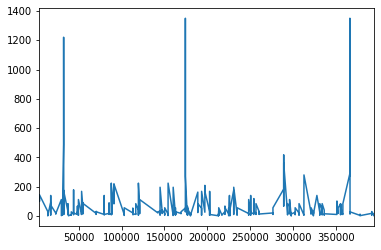

In [132]:
spain_cust['amount_spent'].plot()

#### Select all orders made in the month of August.

In [79]:
only_aug = orders.loc[(orders['month'] == 8)]
only_aug 

Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
199475      285421     561904     22075  2011      8    1     8   
199476      285422     561904    85049E  2011      8    1     8   
199477      285423     561905     21385  2011      8    1     9   
199478      285424     561905    84970L  2011      8    1     9   
199479      285425     561905    84970S  2011      8    1     9   
...            ...        ...       ...   ...    ...  ...   ...   
226483      320688     565067     22644  2011      8    3    17   
226484      320689     565067     22645  2011      8    3    17   
226485      320690     565067     22637  2011      8    3    17   
226486      320691     565067     22646  2011      8    3    17   
226487      320692     565067     22741  2011      8    3    17   

                                Description  Quantity          InvoiceDate  \
199475         6 ribbons elegant christmas         96  2011-08-01 08:30:00   
199476            scandinavian reds ribbons       156  2011-08-01 08:30:00   
199477      ivory hanging decoration  heart        24  2011-08-01 09:31:00   
199478     single heart zinc t-light holder        12  2011-08-01 09:31:00   
199479    hanging heart zinc t-light holder        12  2011-08-01 09:31:00   
...                                     ...       ...                  ...   
226483       ceramic cherry cake money bank         2  2011-08-31 17:16:00   
226484  ceramic heart fairy cake money bank         2  2011-08-31 17:16:00   
226485                piggy bank retrospot          2  2011-08-31 17:16:00   
226486   ceramic strawberry cake money bank         2  2011-08-31 17:16:00   
226487                       funky diva pen        48  2011-08-31 17:16:00   

        UnitPrice  CustomerID         Country  amount_spent  
199475       1.45       17941  United Kingdom        139.20  
199476       1.06       17941  United Kingdom        165.36  
199477       0.85       14947  United Kingdom         20.40  
199478       0.95       14947  United Kingdom         11.40  
199479       0.85       14947  United Kingdom         10.20  
...           ...         ...             ...           ...  
226483       1.45       15856  United Kingdom          2.90  
226484       1.45       15856  United Kingdom          2.90  
226485       2.55       15856  United Kingdom          5.10  
226486       1.45       15856  United Kingdom          2.90  
226487       0.85       15856  United Kingdom         40.80  

[27013 rows x 14 columns]

#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [110]:
only_aug['Country'].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country?

In [88]:
only_aug.groupby('Country').agg({'amount_spent':'mean'})

amount_spent
Country                      
Australia          210.179439
Austria             17.228182
Belgium             18.319691
Canada              10.312000
Channel Islands     34.977000
Denmark             13.321875
EIRE                28.612782
Finland             22.565574
France              24.272337
Germany             24.177069
Iceland             26.586818
Israel              28.501813
Italy               20.957368
Malta               20.345455
Netherlands        144.027893
Norway              26.309221
Poland              23.635294
Portugal            29.790244
Spain               13.281389
Sweden              35.021500
Switzerland         18.613820
United Kingdom      21.573396
Unspecified         23.088261

#### What's the most expensive item?

In [134]:
orders['Description'].loc[orders['UnitPrice'] == orders['UnitPrice'].max()]

118352    postage
Name: Description, dtype: object

#### What is the average amount spent per year?

In [116]:
orders.groupby('year').agg({'amount_spent':'mean'})

amount_spent
year              
2010     21.892733
2011     22.430074